# Datasets and variables using numpy, matplotlib and pandas

*Requirements*: 
Your jupyter notebook should run in an environment with:
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`

In [6]:
%pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Introduction to numpy

Full documentation is available [here](https://numpy.org/) and introduction tutorials are available [here](https://numpy.org/learn/).

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by **a tuple of non-negative integers**. In NumPy dimensions are called **axes**.

### Arrays

In [4]:
import numpy as np

In [7]:
one_dimensional = np.array([1, 2, 3])
two_dimensional = np.array([[1, 2, 3], [4, 5, 6]])

Axes can be accessed by their index:

In [8]:
# Row access
print(two_dimensional[1,:])

# Column access
print(two_dimensional[:,1])

[4 5 6]
[2 5]


#### Exercise:
Write a function that returns the value at index `row_ix` for the row and `col_ix` for the column.


In [34]:
def array_indexer(input_array, row_ix, col_ix):
    """Returns the value at row_ix and col_ix for input_array.
    
    if row_ix==":":
        print(input_array[:,col_ix])
    elif col_ix==":":
        print(input_array[row_ix,:])
    else:
    return
    """
    
    return input_array[row_ix,col_ix]
    
array_indexer(two_dimensional,1,2)

6

### Masking
Masking allows to select only values from an array according to an array of booleans.

In [10]:
# Compare array values to a set value
mask = two_dimensional > 2
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [11]:
# Get values of the array respecting this mask
two_dimensional[mask]

array([3, 4, 5, 6])

## Computing statistical indicators
Numpy comes with lots of functions to compute statistical indicators, either overall the values, or overcolumns and rows.

In [12]:
# Over columns
print(np.mean(two_dimensional, axis=1))

# Over rows
print(np.mean(two_dimensional, axis=0))

# Overall
print(np.mean(two_dimensional))

[2. 5.]
[2.5 3.5 4.5]
3.5


### Exercices: 
Compute the standard error and the median for each row/column of the array `two_dimensional`.

In [13]:
#over rows
#sd
print(f"standard deviation : {np.std(two_dimensional, axis=1,ddof=1)}")
#mean
print(f"mean : {np.mean(two_dimensional, axis=1)}")
#over colums
#sd
print(f"standard deviation : {np.std(two_dimensional, axis=0,ddof=1)}")
#mean
print(f"mean :{np.mean(two_dimensional, axis=0)}")

standard deviation : [1. 1.]
mean : [2. 5.]
standard deviation : [2.12132034 2.12132034 2.12132034]
mean :[2.5 3.5 4.5]


## Plotting using matplotlib
> Add the matplotlib library to your virtual environment `pip install matplotlib`

Matplotlib is a module for generating 2D and 3D graphics. Documentation is available [here](https://matplotlib.org/api/pyplot_summary.html). A set of tutorials are available [here](https://matplotlib.org/stable/tutorials/index.html).

Matplotlib is both **complex** and **very powerful**, so it may take a while for you to learn its full power.

In [14]:
# Generate a random vector for plotting
random_vector = np.random.normal(0, 10, 1000)

### Plotting an histogram

In [15]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'André was here!')

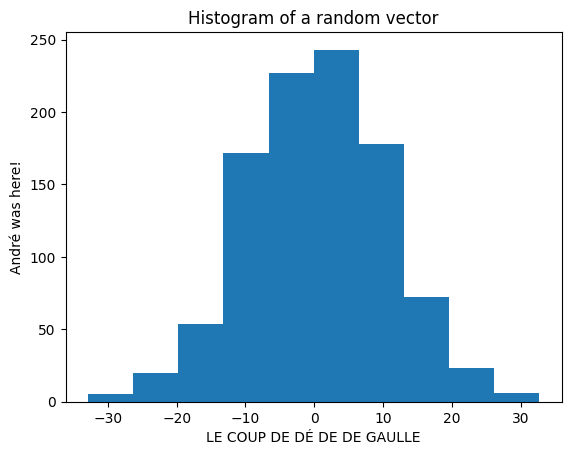

In [16]:
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")
plt.xlabel("LE COUP DE DÉ DE DE GAULLE")
plt.ylabel('André was here!')

#### Exercice:
Add the labels for the x axis and the y axis on the above plot.

### Plotting a boxplot

Text(0.5, 1.0, 'Boxplot of a random vector')

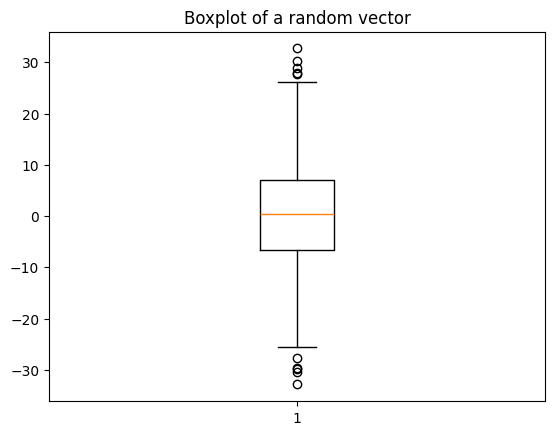

In [17]:
plt.boxplot(x=random_vector)
plt.title("Boxplot of a random vector")

#### Exercice:
Using the same data vector, plot a [violin plot] and play with the different options (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

Text(0.5, 1.0, 'Violinplot of a random vector')

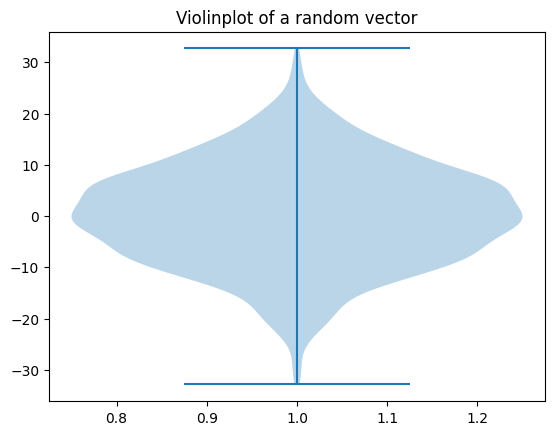

In [56]:
plt.violinplot(random_vector)
plt.title("Violinplot of a random vector")

### Scatter plots
To plot the repartition of two numerical variables, **scatter plots** can be used.

In [19]:
random_vector_1 = np.random.normal(0, 10, 1000)
random_vector_2 = np.random.normal(0, 10, 1000)

Text(0, 0.5, 'Vector 2')

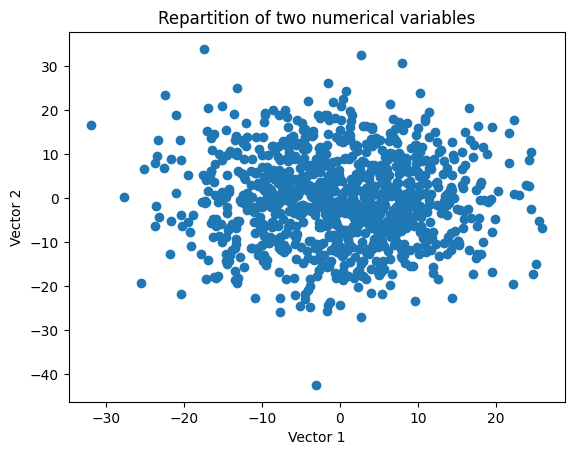

In [20]:
plt.scatter(random_vector_1, random_vector_2)
plt.title("Repartition of two numerical variables")
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")

## Introduction to pandas

Pandas is a very easy to use library for data manipulation (but it can be tricky, because it's so easy to use you'll only rely on pandas afterwards even though it's **slower**).
Full documentation of pandas is [here](https://pandas.pydata.org/) and introduction is [here](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframes
Dataframes (and Series, their one dimensional counterparts) is the pandas class that holds multi-dimensional data.

In [21]:
import pandas as pd

df = pd.DataFrame({"col_0": random_vector_1, "col_1": random_vector_2})

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_53700\3476240247.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
type(df)

pandas.core.frame.DataFrame

Dataframes can be indexed by its location or by its index.

In [23]:
# By column name
df["col_0"]
df.col_0

# By index of column
df.iloc[:,0]

0      10.532417
1      -2.965276
2      11.612428
3      13.341201
4       1.855246
         ...    
995   -12.675173
996     0.620534
997    22.192011
998   -10.848033
999     2.207191
Name: col_0, Length: 1000, dtype: float64

The numpy array can be accessed using the `values` attribute (**it will be important for further labs and for matplotlib**).

In [24]:
df.values

array([[ 10.53241675,   8.3467042 ],
       [ -2.9652763 ,   2.77141581],
       [ 11.61242803, -11.74909431],
       ...,
       [ 22.19201114, -19.39983855],
       [-10.84803267,  -7.86389104],
       [  2.20719114,  -5.04556922]])

### Computing statistical indicators

A generic describes method is available to compute at once all the statistical estimators on a dataset.

In [25]:
df.describe()

,col_0,col_1
count,1000.000000,1000.000000
mean,-0.024610,-0.269618
std,9.747584,10.146752
min,-31.896724,-42.405245
25%,-6.748488,-7.096456
50%,-0.005888,-0.389403
75%,6.812505,6.586257
max,25.895630,33.858472


#### Exercice:
Compute all the estimators available using pandas `describe` method with `numpy`.

In [73]:
#cols
print("mean :",np.mean(df,axis=0))
print("std :",np.std(df,axis=0,ddof=1))
print("25% :",np.quantile(df,0.25,axis=0))
print("50% :",np.quantile(df,0.5, axis=0))
print("75% :",np.quantile(df,0.75, axis=0))
print("max :",np.max(df,axis=0))


mean : col_0   -0.024610
col_1   -0.269618
dtype: float64
std : col_0     9.747584
col_1    10.146752
dtype: float64
25% : [-6.74848751 -7.09645574]
50% : [-0.00588814 -0.38940314]
75% : [6.81250478 6.58625689]
max : col_0    25.895630
col_1    33.858472
dtype: float64


## Plotting using seaborn
[Seaborn](https://seaborn.pydata.org/) is a high-level library, built on top of `matplotlib` for easy plotting of `pandas` dataframe. It helps make beautiful plots very quickly.

In [27]:
import seaborn as sns

### Boxplots

C:\Users\Utilisateur\OneDrive\Documents\cours\MIASHS\S6\ML UE\miashs_introduction_ml\lab1\venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Repartition of column 0')

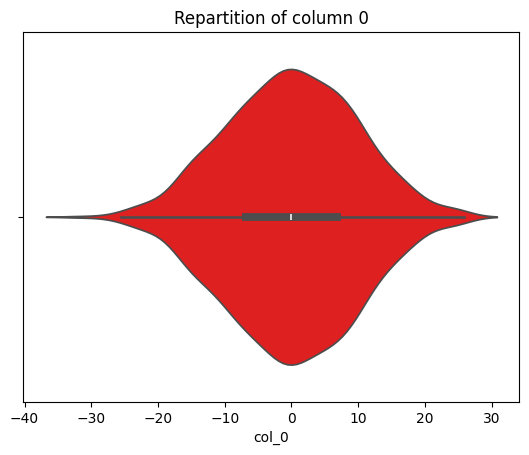

In [28]:
sns.violinplot(data=df, x="col_0",color="red").set_title("Repartition of column 0")


**Exercice**: plot the same boxplot in color red.

## Histograms

Text(0.5, 1.0, 'Repartition of column 0')

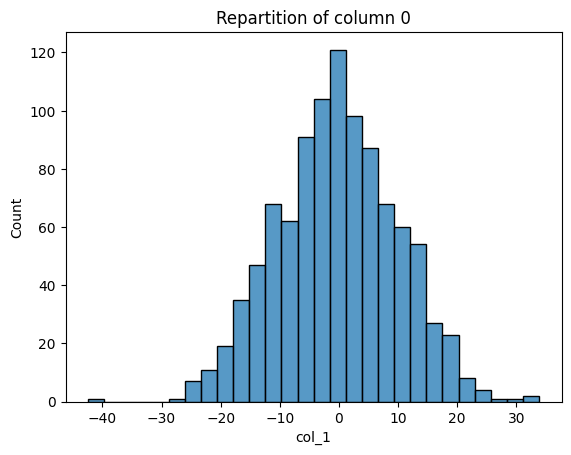

In [29]:
sns.histplot(data=df, x="col_1").set_title("Repartition of column 0")

**Exercice**: set the bin width to 10 and interprete the results.

Text(0.5, 1.0, 'Repartition of column 0')

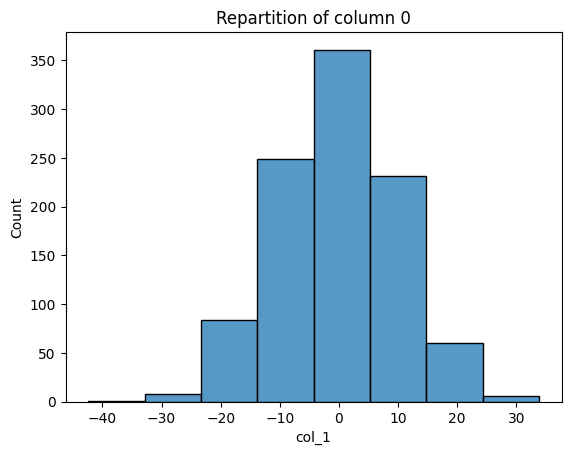

In [30]:
sns.histplot(data=df, x="col_1",binwidth=10).set_title("Repartition of column 0")

### interpretation of Repartition 
the distribution is symetrical around 0


### Scatterplots and curve estimation


<Axes: xlabel='col_0', ylabel='col_1'>

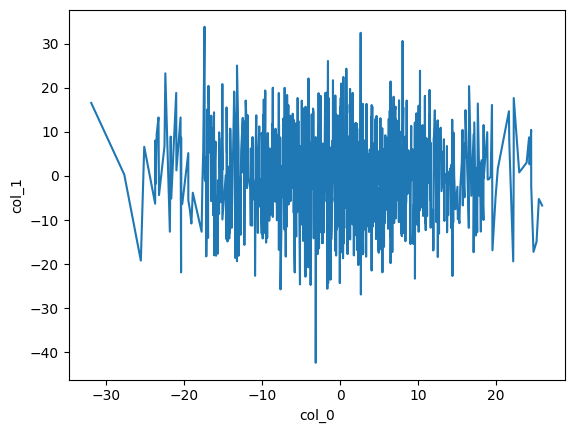

In [31]:
sns.lineplot(data=df, x="col_0", y="col_1")

Text(0.5, 1.0, 'plot of first and second col')

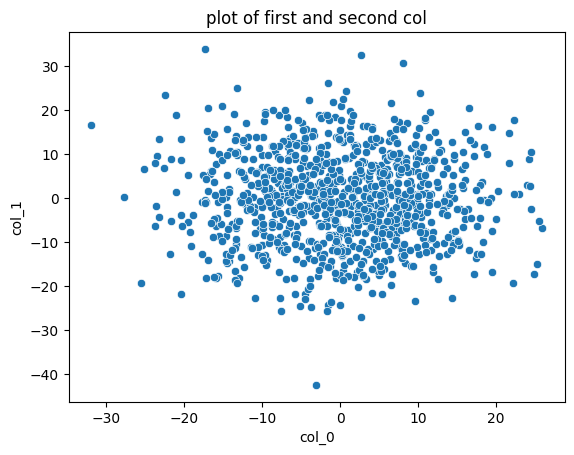

In [32]:
sns.scatterplot(data=df, x="col_0", y="col_1").set_title("plot of first and second col")

**Exercice**: Add a title to the plot.

done